# Python script to create transition networks of aggregating systems

Prerequisites are the following modules:  
1) h5py version 2.10.0  
2) matplotlib version 3.1.2  
3) networkx version 2.4  
4) mdtraj version 1.9.3

## Input

At first the modul "os" is imported to get the right path of the topology (\*.pdb) and trajectory (\*.trr, \*.xtc) file. 

In [24]:
import os

Now some user input is needed (highlighted in blue):

1) Specify the <font color=blue>"BetaVersion" directory path</font> to enable the usage of "BetaVersion" as module in this script.

In [25]:
import sys
BetaVersion_path = '/home/alex/Desktop' # User input needed
sys.path.append(BetaVersion_path)
import BetaVersion as bv

2) Give the <font color=blue>path of the topology and trajectory file</font>. If these files are not located in the same directory as this script, change accordingly.

In [26]:
topology_path = os.path.join(os.getcwd(), 'ab42.pdb') # User input needed
trajectory_path = os.path.join(os.getcwd(), 'ab42.trr') # User input needed

3) Specify the <font color=blue>number of molecules</font> as well as the <font color=blue>number of frames</font> in your trajectory. 

In [27]:
number_of_molecules = 20 # User input needed
number_of_frames = 11 # User input needed

## Feature computation

BetaVersion comes with four features:  
1) Oligomersize  
2) Saltbridge contacts  
3) Hydrophobic contacts  
4) Compactness  
  
For a detailed description see:  
Pathways of Amyloid-β Aggregation Depend on Oligomer Shape  
B. Barz, Q. Liao, B. Strodel  
J. Am. Chem. Soc., 140: 319-327 (2018)  
[link](https://pubs.acs.org/doi/abs/10.1021/jacs.7b10343)

First of all the class "Compute" is initialized. Additional keyword arguments are the boolian Write_hdf5 (create new \*.hdf5 file) and the integer Chunksize (loads trajectory in chunks). Then, the features are calculated (note: [Cutoff]=nm)

In [28]:
c = bv.Compute(Trajectory=trajectory_path, Topology=topology_path, Number_of_Molecules=number_of_molecules, Number_of_Frames=number_of_frames)
c.Oligomersize(Cutoff=0.3)
c.Saltbridge_Contacts(Cutoff=1.5)
c.Hydrophobic_Contacts(Cutoff=1.0)
c.Compactness()

()

## Extract features and create gephi compatible network file

In [29]:
r = bv.Reader(number_of_molecules, number_of_frames)
f1 = r.Oligomersize()
f2 = r.Saltbridge_Contacts()
f3 = r.Hydrophobic_Contacts()
f4 = r.Compactness()

"Min_Population" writes only nodes with (population(node)/max(population)) >= Min_Population to network file. 

({(1, 0, 0, 2): 19,
  (1, 0, 0, 4): 19,
  (1, 0, 0, 6): 53,
  (1, 0, 0, 7): 10,
  (1, 0, 0, 3): 7},
 {((1, 0, 0, 2), (1, 0, 0, 4)): 1,
  ((1, 0, 0, 2), (1, 0, 0, 3)): 4,
  ((1, 0, 0, 4), (1, 0, 0, 6)): 2,
  ((1, 0, 0, 4), (1, 0, 0, 3)): 5,
  ((1, 0, 0, 6), (1, 0, 0, 4)): 1,
  ((1, 0, 0, 6), (1, 0, 0, 7)): 13,
  ((1, 0, 0, 7), (1, 0, 0, 6)): 12,
  ((1, 0, 0, 3), (1, 0, 0, 2)): 2,
  ((1, 0, 0, 3), (1, 0, 0, 4)): 4})

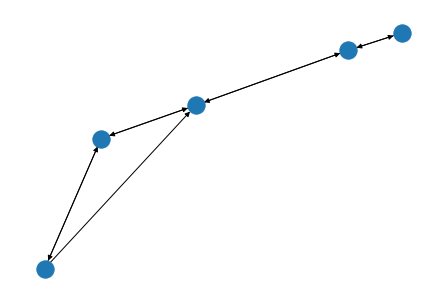

In [30]:
r.Network_Data(f1, f2, f3, f4, Min_Population=0.1)

The resulting "\*.gexf" file can be opened and modified with gephi.